In [1]:
%matplotlib notebook
import uproot as ur
import matplotlib.pyplot as plt
import k3d
import numpy as np
import awkward as ak


## Get file and TTree, print branches, convert to array

In [2]:
file = ur.open('sim_highq2.root')
tree = file['events']
print(tree.keys())
ak_arrays = tree.arrays()

['mcparticles', 'mcparticles/mcparticles.ID', 'mcparticles/mcparticles.g4Parent', 'mcparticles/mcparticles.reason', 'mcparticles/mcparticles.mask', 'mcparticles/mcparticles.steps', 'mcparticles/mcparticles.secondaries', 'mcparticles/mcparticles.pdgID', 'mcparticles/mcparticles.status', 'mcparticles/mcparticles.colorFlow[2]', 'mcparticles/mcparticles.genStatus', 'mcparticles/mcparticles.charge', 'mcparticles/mcparticles.spare[1]', 'mcparticles/mcparticles.spin[3]', 'mcparticles/mcparticles.vsx', 'mcparticles/mcparticles.vsy', 'mcparticles/mcparticles.vsz', 'mcparticles/mcparticles.vex', 'mcparticles/mcparticles.vey', 'mcparticles/mcparticles.vez', 'mcparticles/mcparticles.psx', 'mcparticles/mcparticles.psy', 'mcparticles/mcparticles.psz', 'mcparticles/mcparticles.pex', 'mcparticles/mcparticles.pey', 'mcparticles/mcparticles.pez', 'mcparticles/mcparticles.mass', 'mcparticles/mcparticles.time', 'mcparticles/mcparticles.properTime', 'mcparticles/mcparticles.parents_begin', 'mcparticles/mcp

In [16]:
def get_vector(varname='HcalBarrelHits',energy='energyDeposit'):
    E = np.array(ak.to_list(ak_arrays["%s.%s"%(varname,energy)]), dtype="O")
    x = np.array(ak.to_list(ak_arrays["%s.position.x"%varname]), dtype="O")
    y = np.array(ak.to_list(ak_arrays["%s.position.y"%varname]), dtype="O")
    z = np.array(ak.to_list(ak_arrays["%s.position.z"%varname]), dtype="O")

    
    return E,x, y, z

In [4]:
E = {}
x = {}
y = {}
z  = {}
r={}

## Get data

In [6]:
for i in ['HcalBarrel','EcalBarrel','TrackerBarrel','VertexBarrel']:
    E[i], x[i], y[i],z[i] = get_vector("%sHits"%i)


In [7]:
for i in ['HcalEndcap','EcalEndcap','TrackerEndcap','VertexEndcap']:
    E[i], x[i], y[i],z[i] = get_vector("%sHits"%i)

In [17]:
for i in ['DIRC']:
    E[i], x[i], y[i],z[i] = get_vector("%sHits"%i,'energy')

## Plot 2D transverse view for hits in barrel

1


<IPython.core.display.Javascript object>


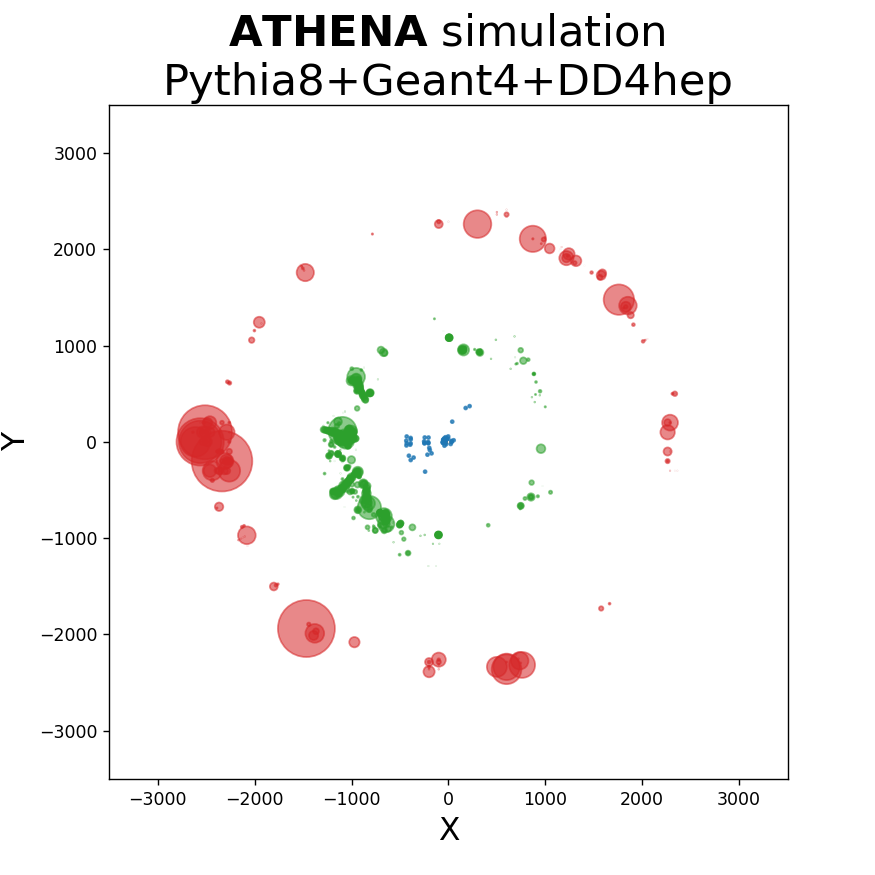

1
[]
2


<ipython-input-21-1e9a451746f5>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()#projection='polar')


<IPython.core.display.Javascript object>


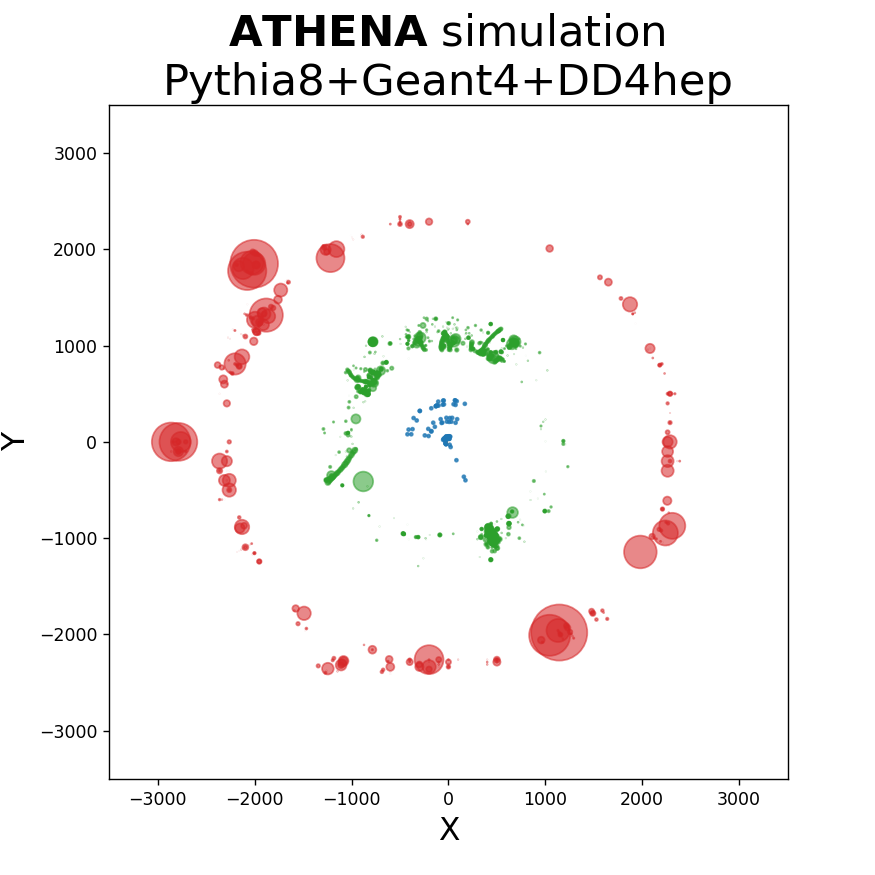

2
[]


In [21]:
#loop over events
for ievt in range(0,3):
    #HERE FILTER YOUR EVENTS IF YOU WANT
    #if(len(x['VertexBarrel'][ievt])<3): continue
    if(len(x['TrackerBarrel'][ievt])<20): continue
    #if(len(x['HcalBarrel'][ievt])<50): continue

    x_tracker = np.concatenate((x['VertexBarrel'][ievt], x['TrackerBarrel'][ievt]), axis=0)
    y_tracker = np.concatenate((y['VertexBarrel'][ievt], y['TrackerBarrel'][ievt]), axis=0)
    E_tracker = np.concatenate((E['VertexBarrel'][ievt], E['TrackerBarrel'][ievt]), axis=0)
    area = E_tracker
    area = np.divide(area,sum(area))
    area = np.multiply(area,250.0)

    print(ievt)
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot()#projection='polar')
    c = ax.scatter(x_tracker, y_tracker, s=3*np.ones(len(x_tracker)), cmap='hsv', alpha=0.75,label='Tracker')

    x_tracker = np.concatenate((x['VertexEndcap'][ievt], x['TrackerEndcap'][ievt]), axis=0)
    y_tracker = np.concatenate((y['VertexEndcap'][ievt], y['TrackerEndcap'][ievt]), axis=0)
    E_tracker = np.concatenate((E['VertexEndcap'][ievt], E['TrackerEndcap'][ievt]), axis=0)
    area = E_tracker
    area = np.divide(area,sum(area))
    area = np.multiply(area,250.0)

    print(ievt)
    ax = fig.add_subplot()#projection='polar')
    c = ax.scatter([0],[0], s=0.01, cmap='hsv', alpha=0.75)
    
    
    for i in ['Ecal','Hcal']:
        key = '%sBarrel'%i
        area = E[key][ievt]
        area = np.divide(area,sum(area))
        area = np.multiply(area,6000.0)
        if(i=='Hcal'):
            area = area*1.5
        c = ax.scatter(x[key][ievt], y[key][ievt], s=area,cmap='hsv', alpha=0.55,label=key)

    #Plot DIRC
    c = ax.scatter(x['DIRC'][ievt], y['DIRC'][ievt],s=np.ones(len(x['DIRC'][ievt])),cmap='hsv', alpha=0.55,label=key)
    print(x['DIRC'][ievt])
    ax.set_title( r"$\bf{ATHENA}$" +' simulation \nPythia8+Geant4+DD4hep',fontsize=25)
    ax.set_ylabel('Y',fontsize=18)
    ax.set_xlabel('X',fontsize=18)
    #plt.legend()
    ax.set_ylim([-3500,3500])
    ax.set_xlim([-3500,3500])
    plt.savefig('pics/event_%i.png'%(ievt))

## 2D projection (theta, phi)

1


<IPython.core.display.Javascript object>


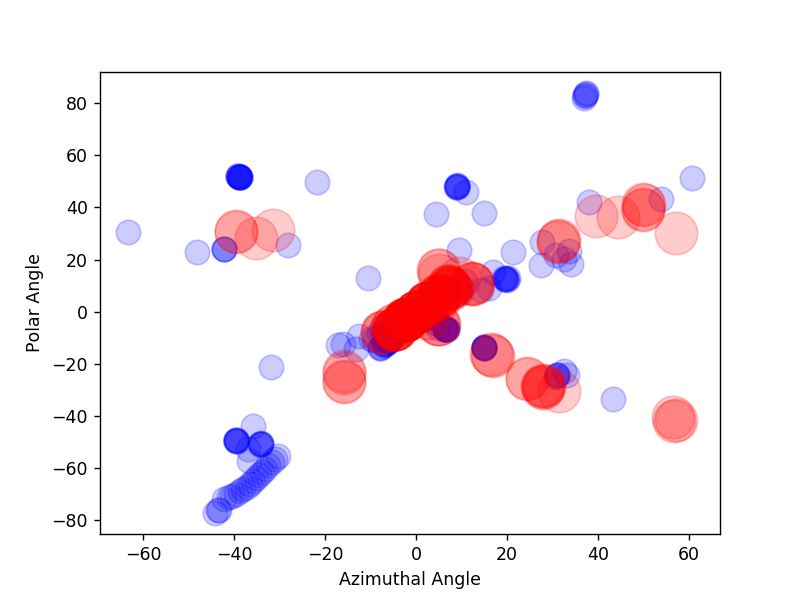

2


<ipython-input-13-84806e882a60>:19: RuntimeWarning: invalid value encountered in arcsin
  phi = 180.0/np.pi*np.arcsin(np.divide(y[key][ievt],x[key][ievt]))
<ipython-input-13-84806e882a60>:20: RuntimeWarning: invalid value encountered in arcsin
  theta = 180.0/np.pi*np.arcsin(np.divide(y[key][ievt],z[key][ievt]))


<IPython.core.display.Javascript object>


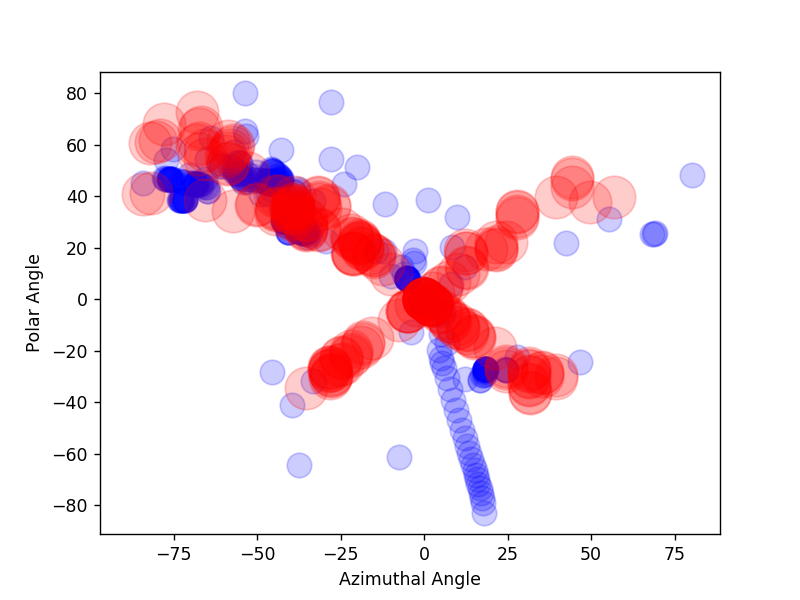

4


<IPython.core.display.Javascript object>


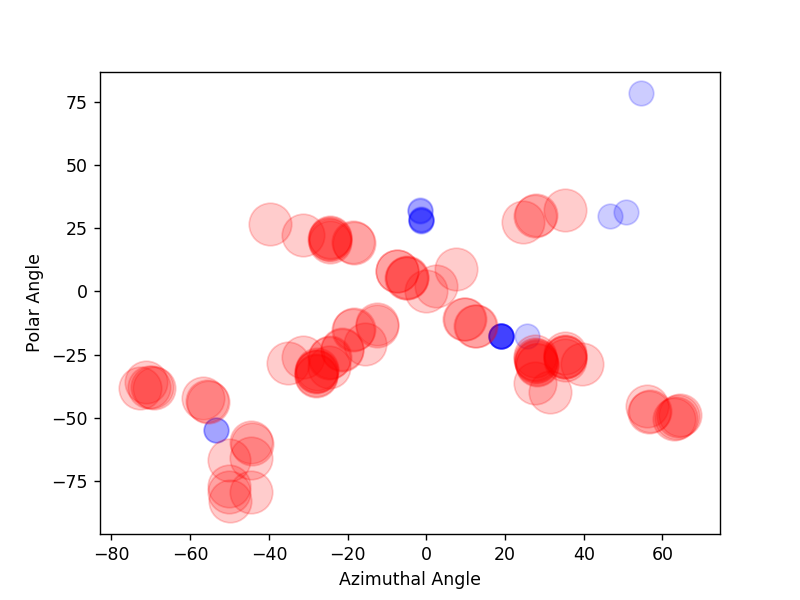

7


<IPython.core.display.Javascript object>


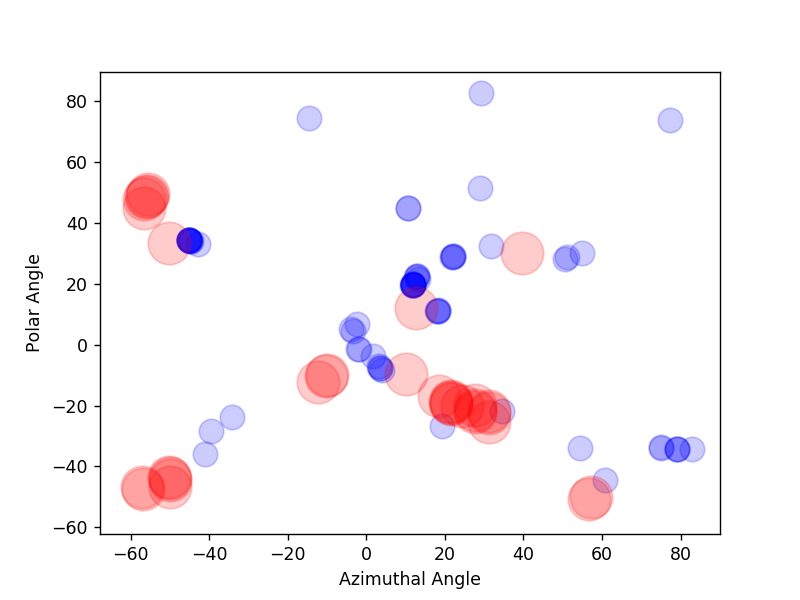

9


<IPython.core.display.Javascript object>


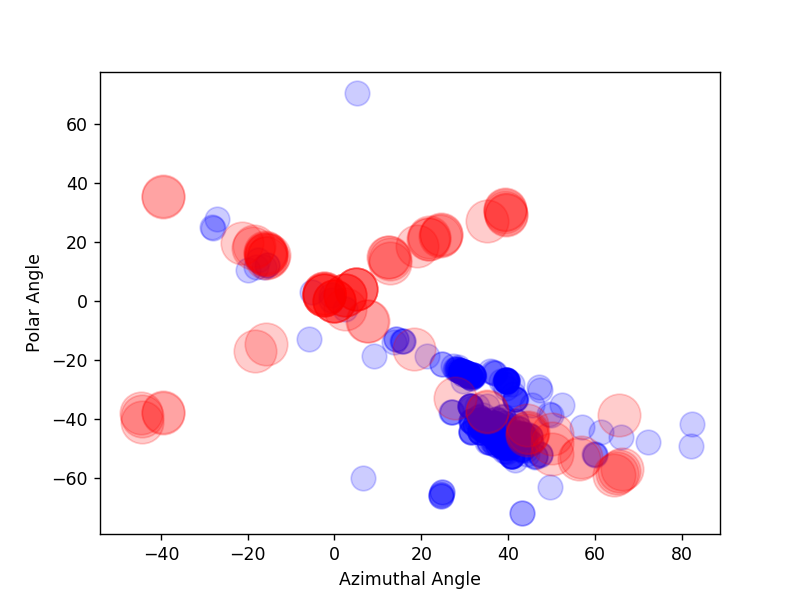

13


<IPython.core.display.Javascript object>


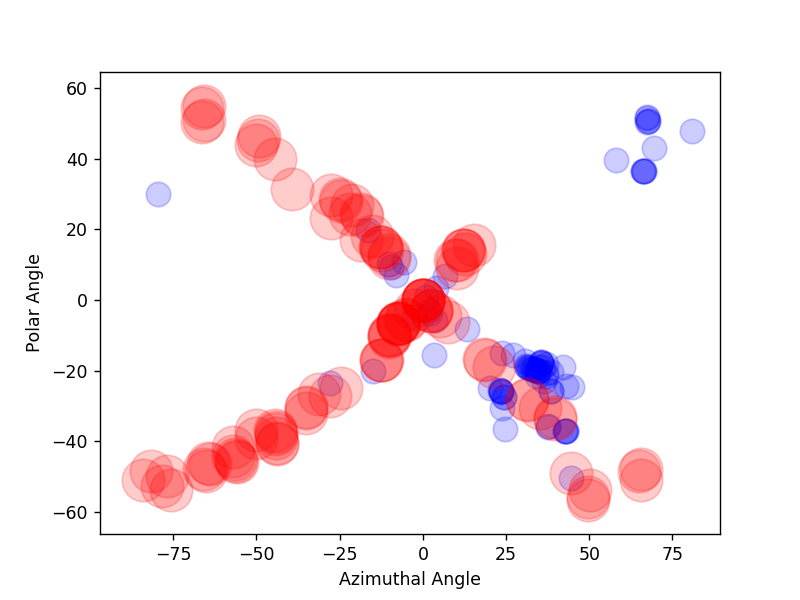

14


<IPython.core.display.Javascript object>


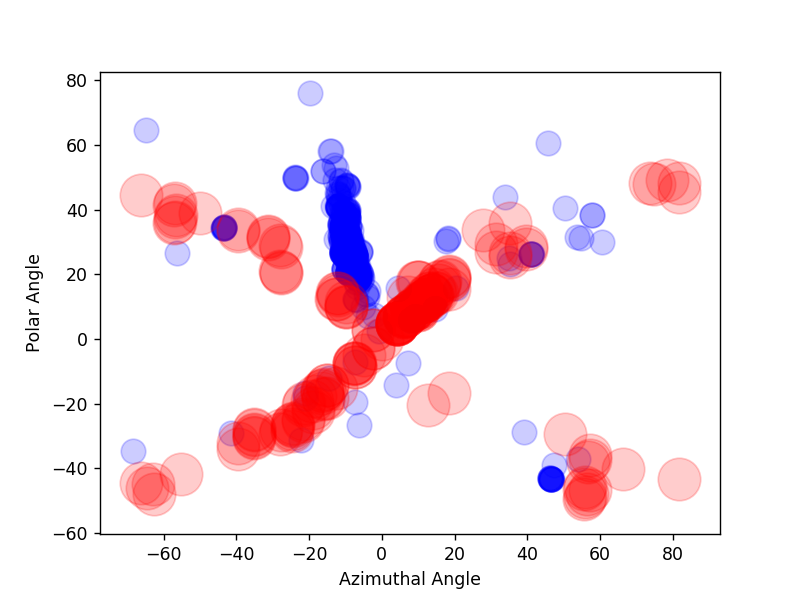

15


<IPython.core.display.Javascript object>


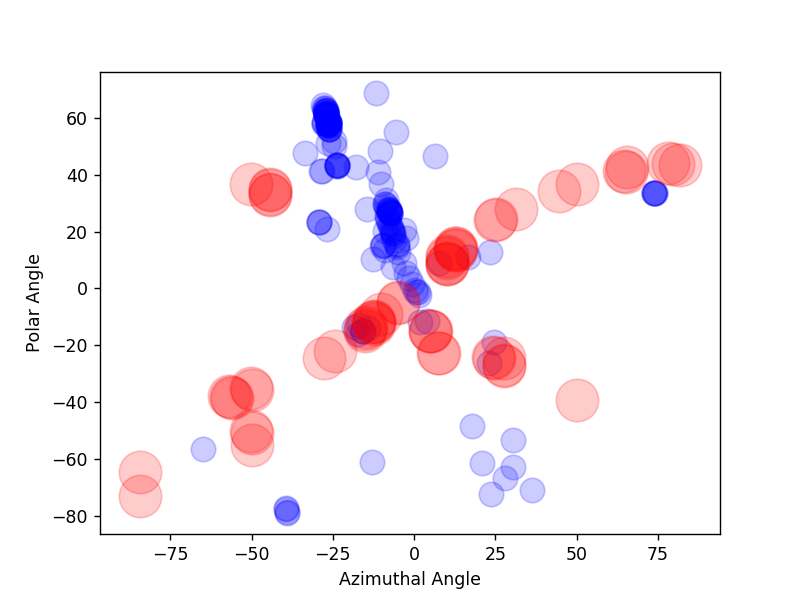

17


<IPython.core.display.Javascript object>


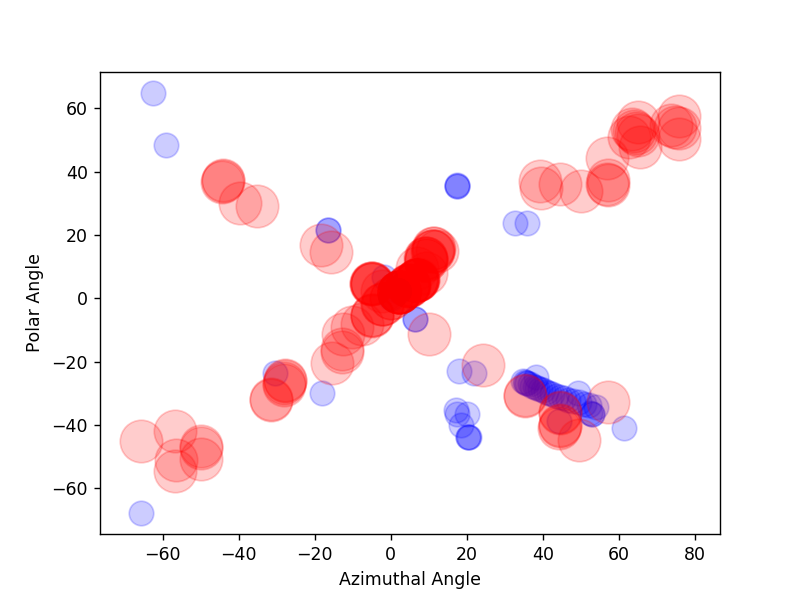

18


<IPython.core.display.Javascript object>


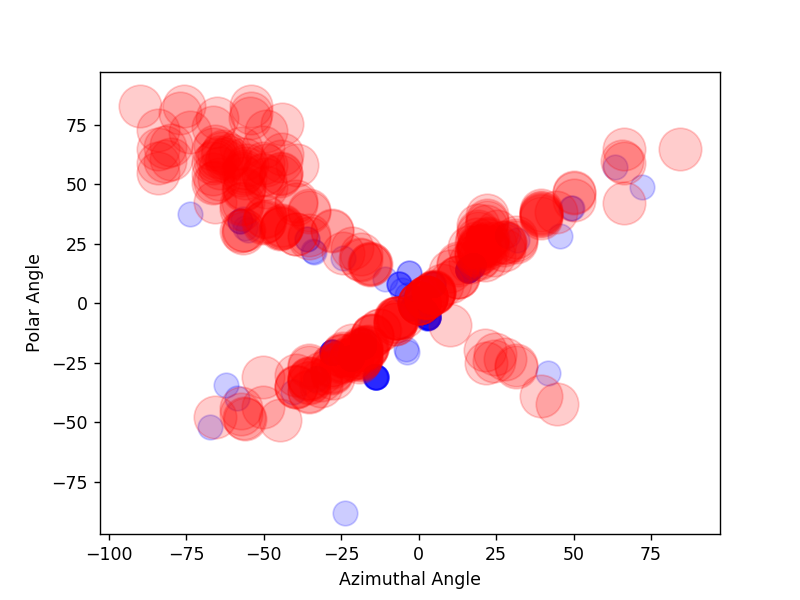

20


<IPython.core.display.Javascript object>


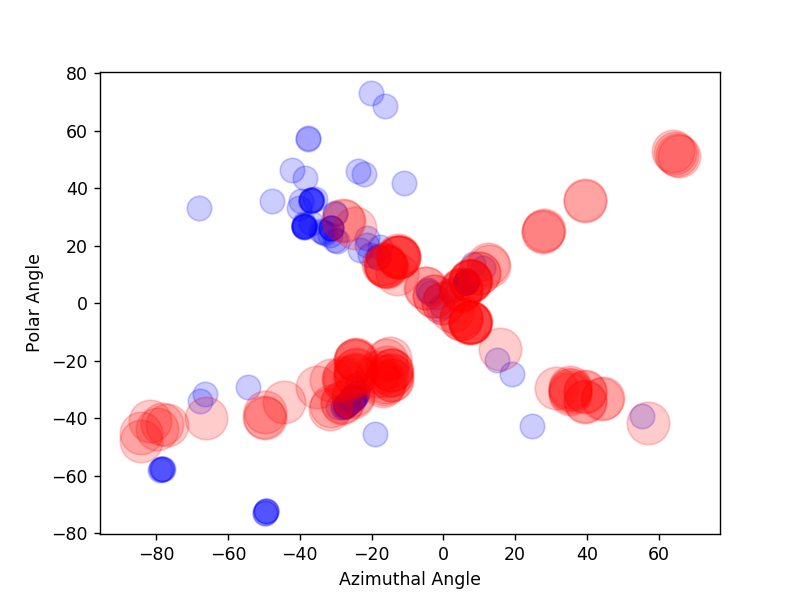

21


<IPython.core.display.Javascript object>


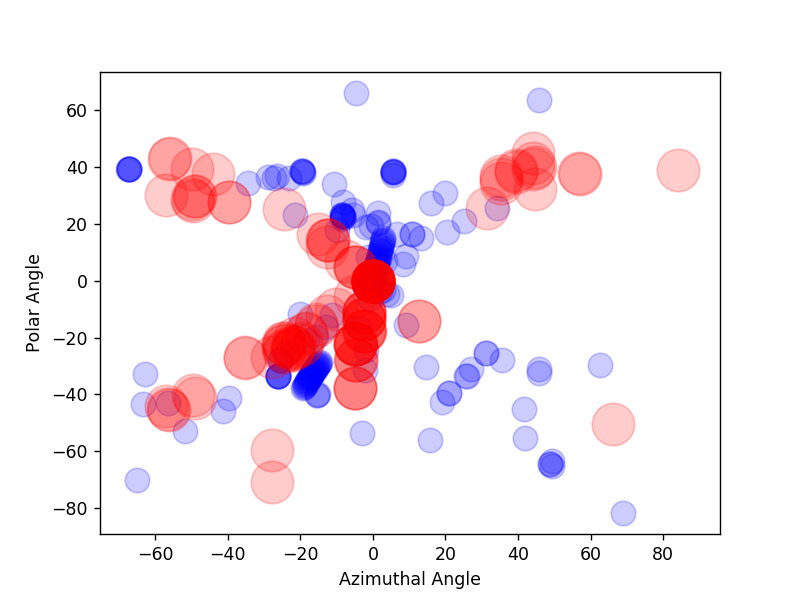

22


<IPython.core.display.Javascript object>


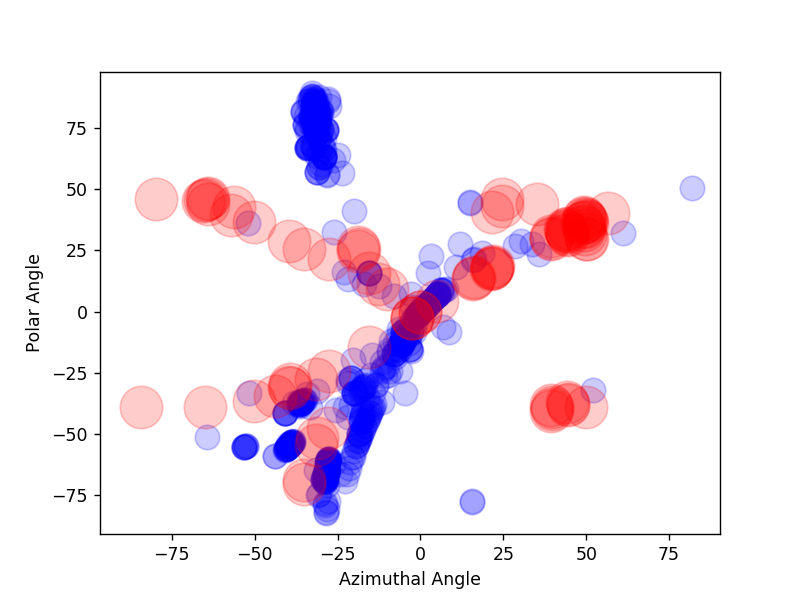

28


<IPython.core.display.Javascript object>


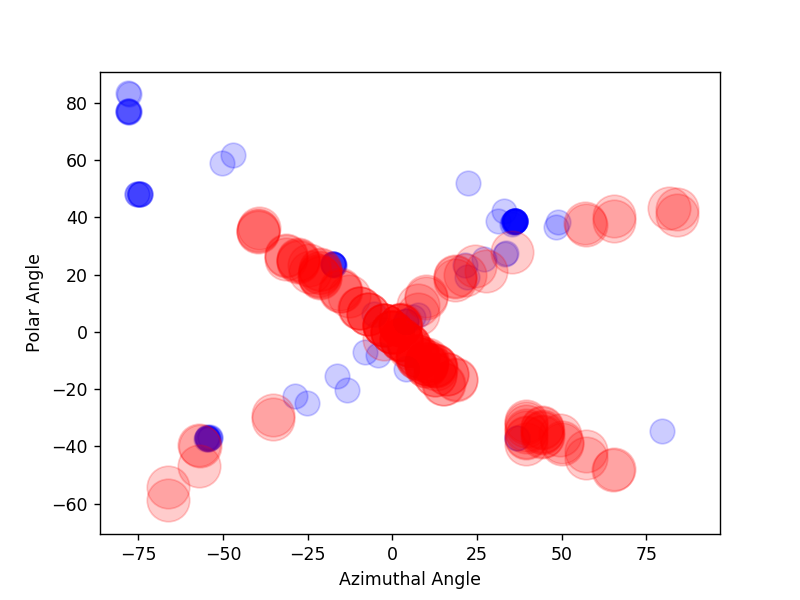

29


<IPython.core.display.Javascript object>


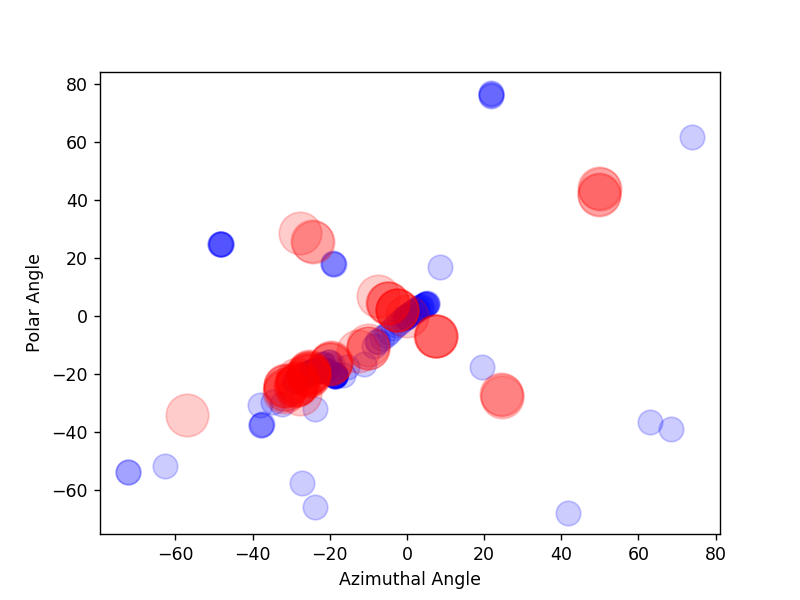

In [13]:

for ievt in range(1,30):
    #ievt = 327
    #if(len(x['VertexBarrel'][ievt])<3): continue
    if(len(x['TrackerBarrel'][ievt])<20): continue
    #fig = plt.figure(figsize=(7,7))
    #ax = fig.add_subplot(projection='polar')
    
    print(ievt)
    colors = {}
    colors['Tracker'] = 'k'
    colors['Hcal'] = 'red'
    colors['Ecal'] = 'blue'
    fig = plt.figure()
    ax = fig.add_subplot(111)

    for j in ['Barrel']:
        for i in ['Ecal','Hcal']:
            key = '%s%s'%(i,j)
            phi = 180.0/np.pi*np.arcsin(np.divide(y[key][ievt],x[key][ievt]))
            theta = 180.0/np.pi*np.arcsin(np.divide(y[key][ievt],z[key][ievt]))
            #xx = np.sin(phi)*np.cos(theta)
            #yy = np.sin(phi)*np.sin(theta)
            #zz = np.cos(phi)
             
            area = E[key][ievt]
            area = np.divide(area,sum(area))
            area = np.multiply(area,260.0)
            area=200
            if(i=='Hcal'):
                area=600
            
            ax.scatter(phi,theta,s=area,cmap='hsv',color=colors[i],alpha=0.2,label=i)
            #ax.set_ylim([-np.pi/2.0,np.pi/2.0])
            #ax.set_xlim([-np.pi/2.0,np.pi/2.0])     
            ax.set_ylabel('Polar Angle')
            ax.set_xlabel('Azimuthal Angle')
    #plt.legend()

        
    
    

## 3D viz

<ipython-input-14-60a6010b8234>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


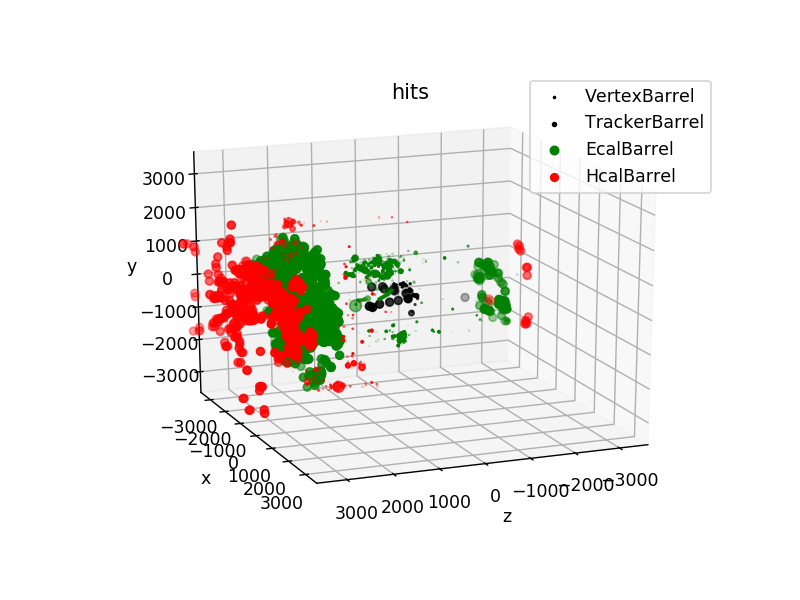

In [14]:
from mpl_toolkits import mplot3d
import matplotlib.colors as colors
import matplotlib.cbook as cbook
fig = plt.figure()
ax = plt.axes(projection='3d')
ievt =2

ax.set_title('hits')

colors = {}
colors['Vertex'] = 'black'
colors['Tracker'] = 'black'
colors['Ecal']  = 'green'
colors['Hcal']  = 'red'
for i in ['Vertex','Tracker','Ecal','Hcal']:
    key = '%sBarrel'%i
    area = E[key][ievt]
    area = np.divide(area,sum(area))
    area = np.multiply(area,len(E[key][ievt]))
    ax.scatter3D(z[key][ievt],x[key][ievt],y[key][ievt],s=area, color=colors[i],label=key)
plt.legend()

for i in ['Vertex','Tracker','Ecal','Hcal']:
    key = '%sEndcap'%i
    area = E[key][ievt]
    area = np.divide(area,sum(area))
    area = np.multiply(area,5*len(E[key][ievt]))
    ax.scatter3D(z[key][ievt],x[key][ievt],y[key][ievt],color=colors[i],label=key)    
#ax.scatter3D(z_ecalhit[ievt],x_ecalhit[ievt],y_ecalhit[ievt], cmap='viridis',label='Ecal')


#ax.scatter3D(z_hcalhit[ievt],x_hcalhit[ievt],y_hcalhit[ievt], cmap='copper',label='hcal')

ax.axes.set_xlim3d(left=-3500, right=3500) 
ax.axes.set_ylim3d(bottom=-3500, top=3500) 
ax.axes.set_zlim3d(bottom=-3500, top=3500) 
ax.axes.set_ylabel('x')
ax.axes.set_zlabel('y')
ax.axes.set_xlabel('z')
ax.view_init(30, 30)


